## Exploration Data Analyis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('data/KaggleV2-May-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Clean Data And Add Wait Time Column

In [5]:
from sklearn.preprocessing import LabelEncoder

# Convert dates
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Encode Gender
df['Gender'] = (df['Gender'] == 'M').astype(int)  # Male=1, Female=0

# Encode target variable
df['No-show'] = (df['No-show'] == 'Yes').astype(int)  # Yes=1, No=0

# Create wait time feature
df['WaitDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Label encode Neighbourhood
le = LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])

## Data Visualization

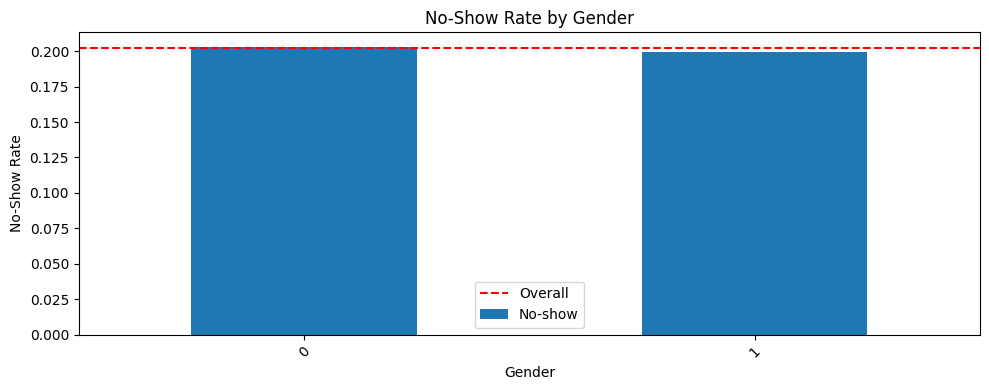

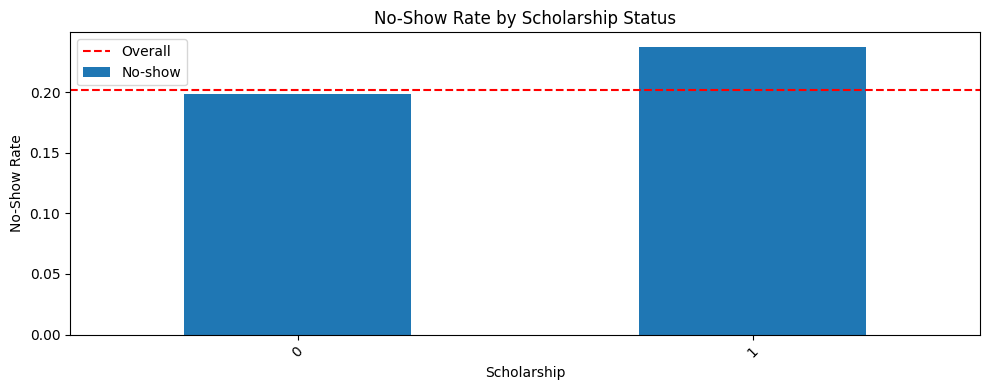

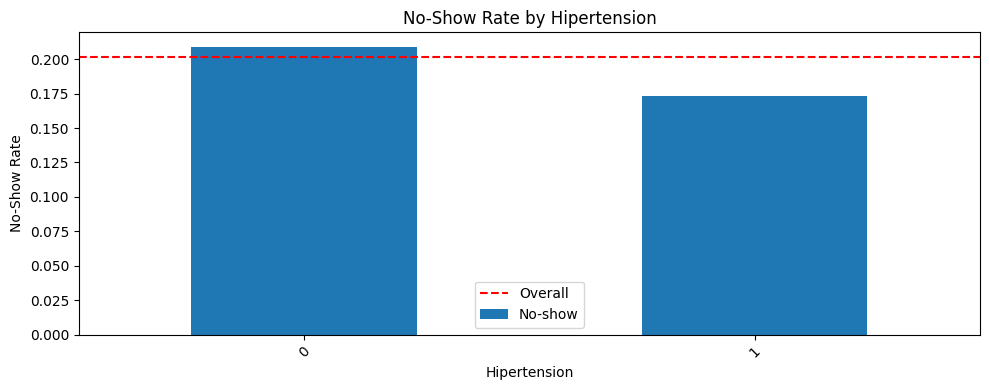

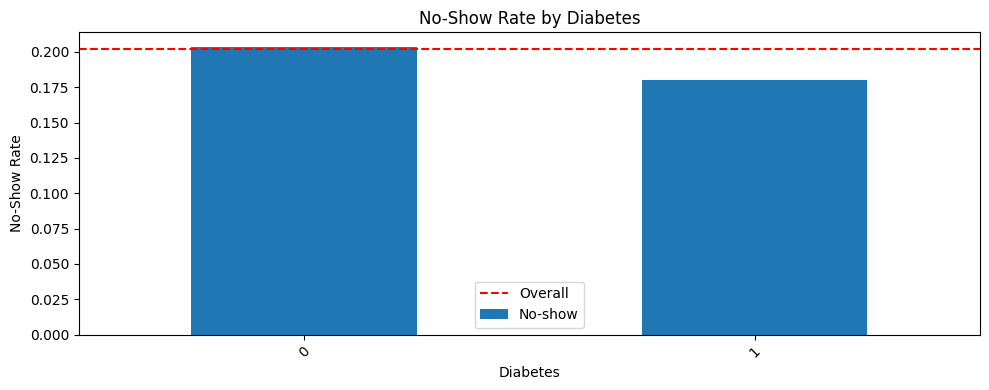

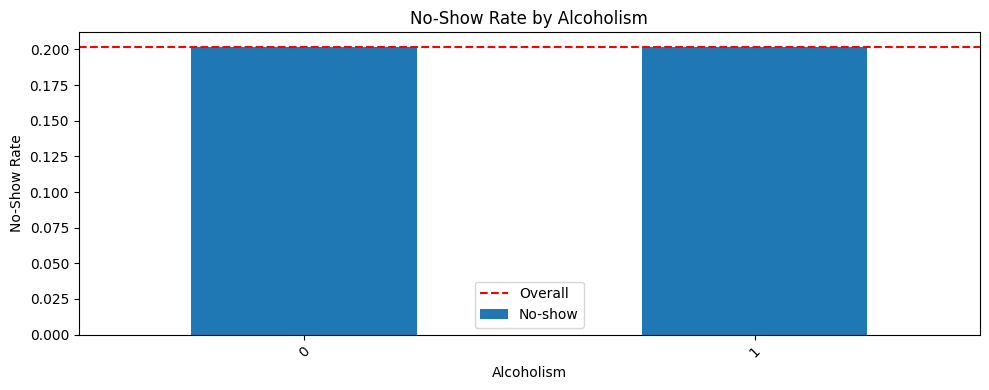

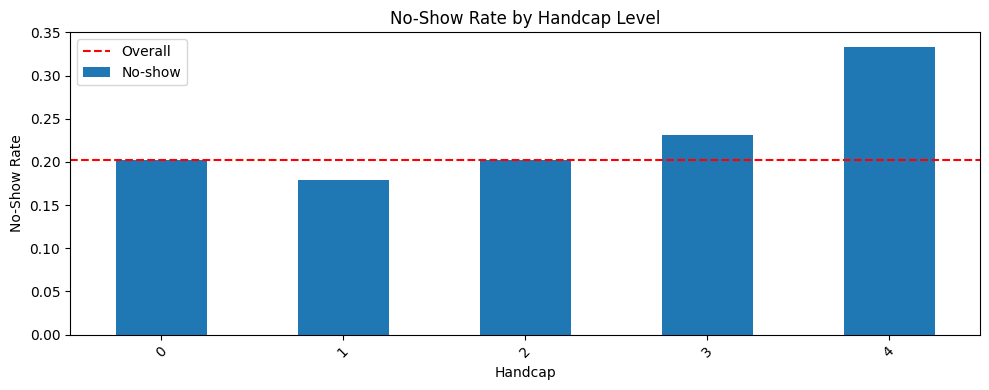

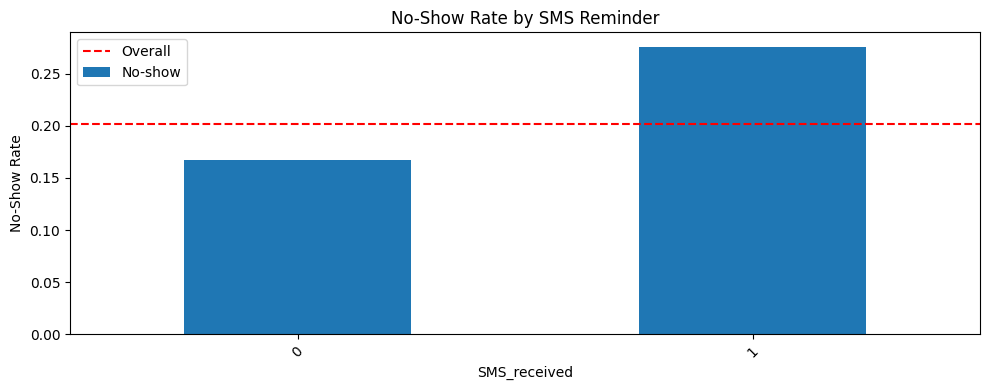

In [6]:
def plot_noshow_rate(feature, title=None):
    rate = df.groupby(feature)['No-show'].mean()
    plt.figure(figsize=(10, 4))
    rate.plot(kind='bar')
    plt.title(title or f'No-Show Rate by {feature}')
    plt.ylabel('No-Show Rate')
    plt.axhline(y=df['No-show'].mean(), color='r', linestyle='--', label='Overall')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# All features vs No-show
plot_noshow_rate('Gender', 'No-Show Rate by Gender')
plot_noshow_rate('Scholarship', 'No-Show Rate by Scholarship Status')
plot_noshow_rate('Hipertension', 'No-Show Rate by Hipertension')
plot_noshow_rate('Diabetes', 'No-Show Rate by Diabetes')
plot_noshow_rate('Alcoholism', 'No-Show Rate by Alcoholism')
plot_noshow_rate('Handcap', 'No-Show Rate by Handcap Level')
plot_noshow_rate('SMS_received', 'No-Show Rate by SMS Reminder')

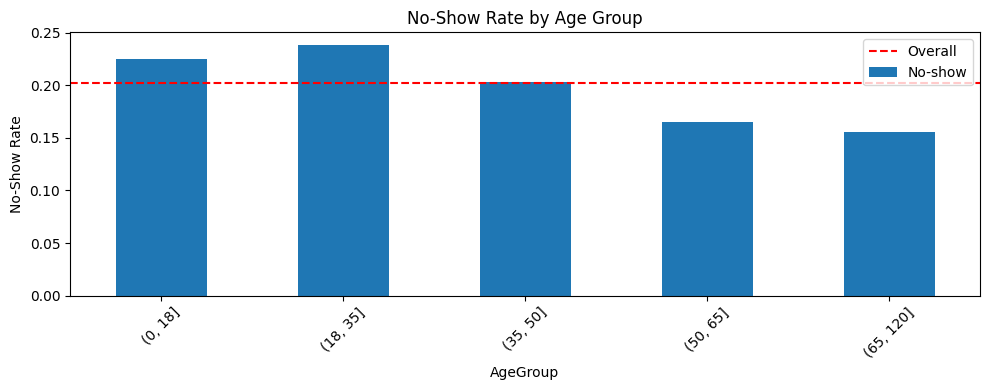

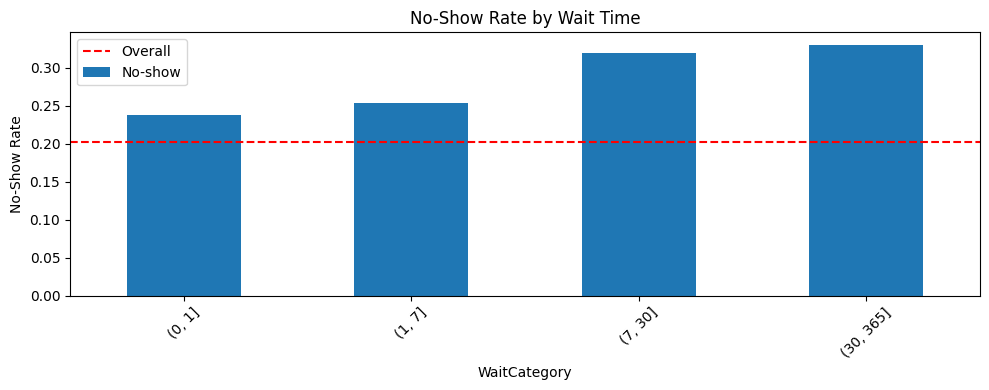

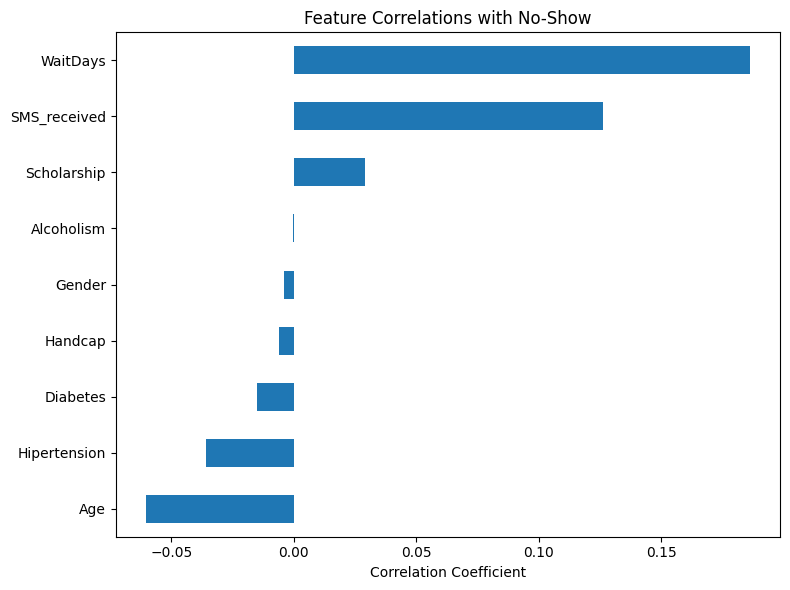

In [7]:
# Age vs No-show
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 120])
plot_noshow_rate('AgeGroup', 'No-Show Rate by Age Group')

# WaitDays vs No-show
df['WaitCategory'] = pd.cut(df['WaitDays'], bins=[0, 1, 7, 30, 365])
plot_noshow_rate('WaitCategory', 'No-Show Rate by Wait Time')

# Correlation with target
correlations = df[['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes', 
                   'Alcoholism', 'Handcap', 'SMS_received', 'WaitDays', 'No-show']].corr()['No-show'].sort_values()
plt.figure(figsize=(8, 6))
correlations.drop('No-show').plot(kind='barh')
plt.title('Feature Correlations with No-Show')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

## Feature Selection

In [41]:
# Convert datetime columns back to datetime type (if they exist as strings in CSV)
if 'ScheduledDay' in df.columns:
    df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
    # Create Unix timestamp column for correlation (seconds since epoch)
    df['ScheduledTimestamp'] = (df['ScheduledDay'].astype('int64') // 10**9).astype(int)

if 'AppointmentDay' in df.columns:
    df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
    # Create Unix timestamp column for correlation (seconds since epoch)
    df['AppointmentTimestamp'] = (df['AppointmentDay'].astype('int64') // 10**9).astype(int)

# Split features and target
X = df.drop(columns=['No-show'])
y = df['No-show']

X = X.select_dtypes(include=[np.number]) # drops ScheduledDay and AppointmentDay
print(f"Features shape: {X.shape}")
print(f"Feature columns: {list(X.columns)}")
print(f"\nOriginal datetime columns preserved in df: {list(df.select_dtypes(include=['datetime64']).columns)}")

Features shape: (110527, 14)
Feature columns: ['PatientId', 'AppointmentID', 'Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'WaitDays', 'ScheduledTimestamp', 'AppointmentTimestamp']

Original datetime columns preserved in df: []


## Correlation Matrix

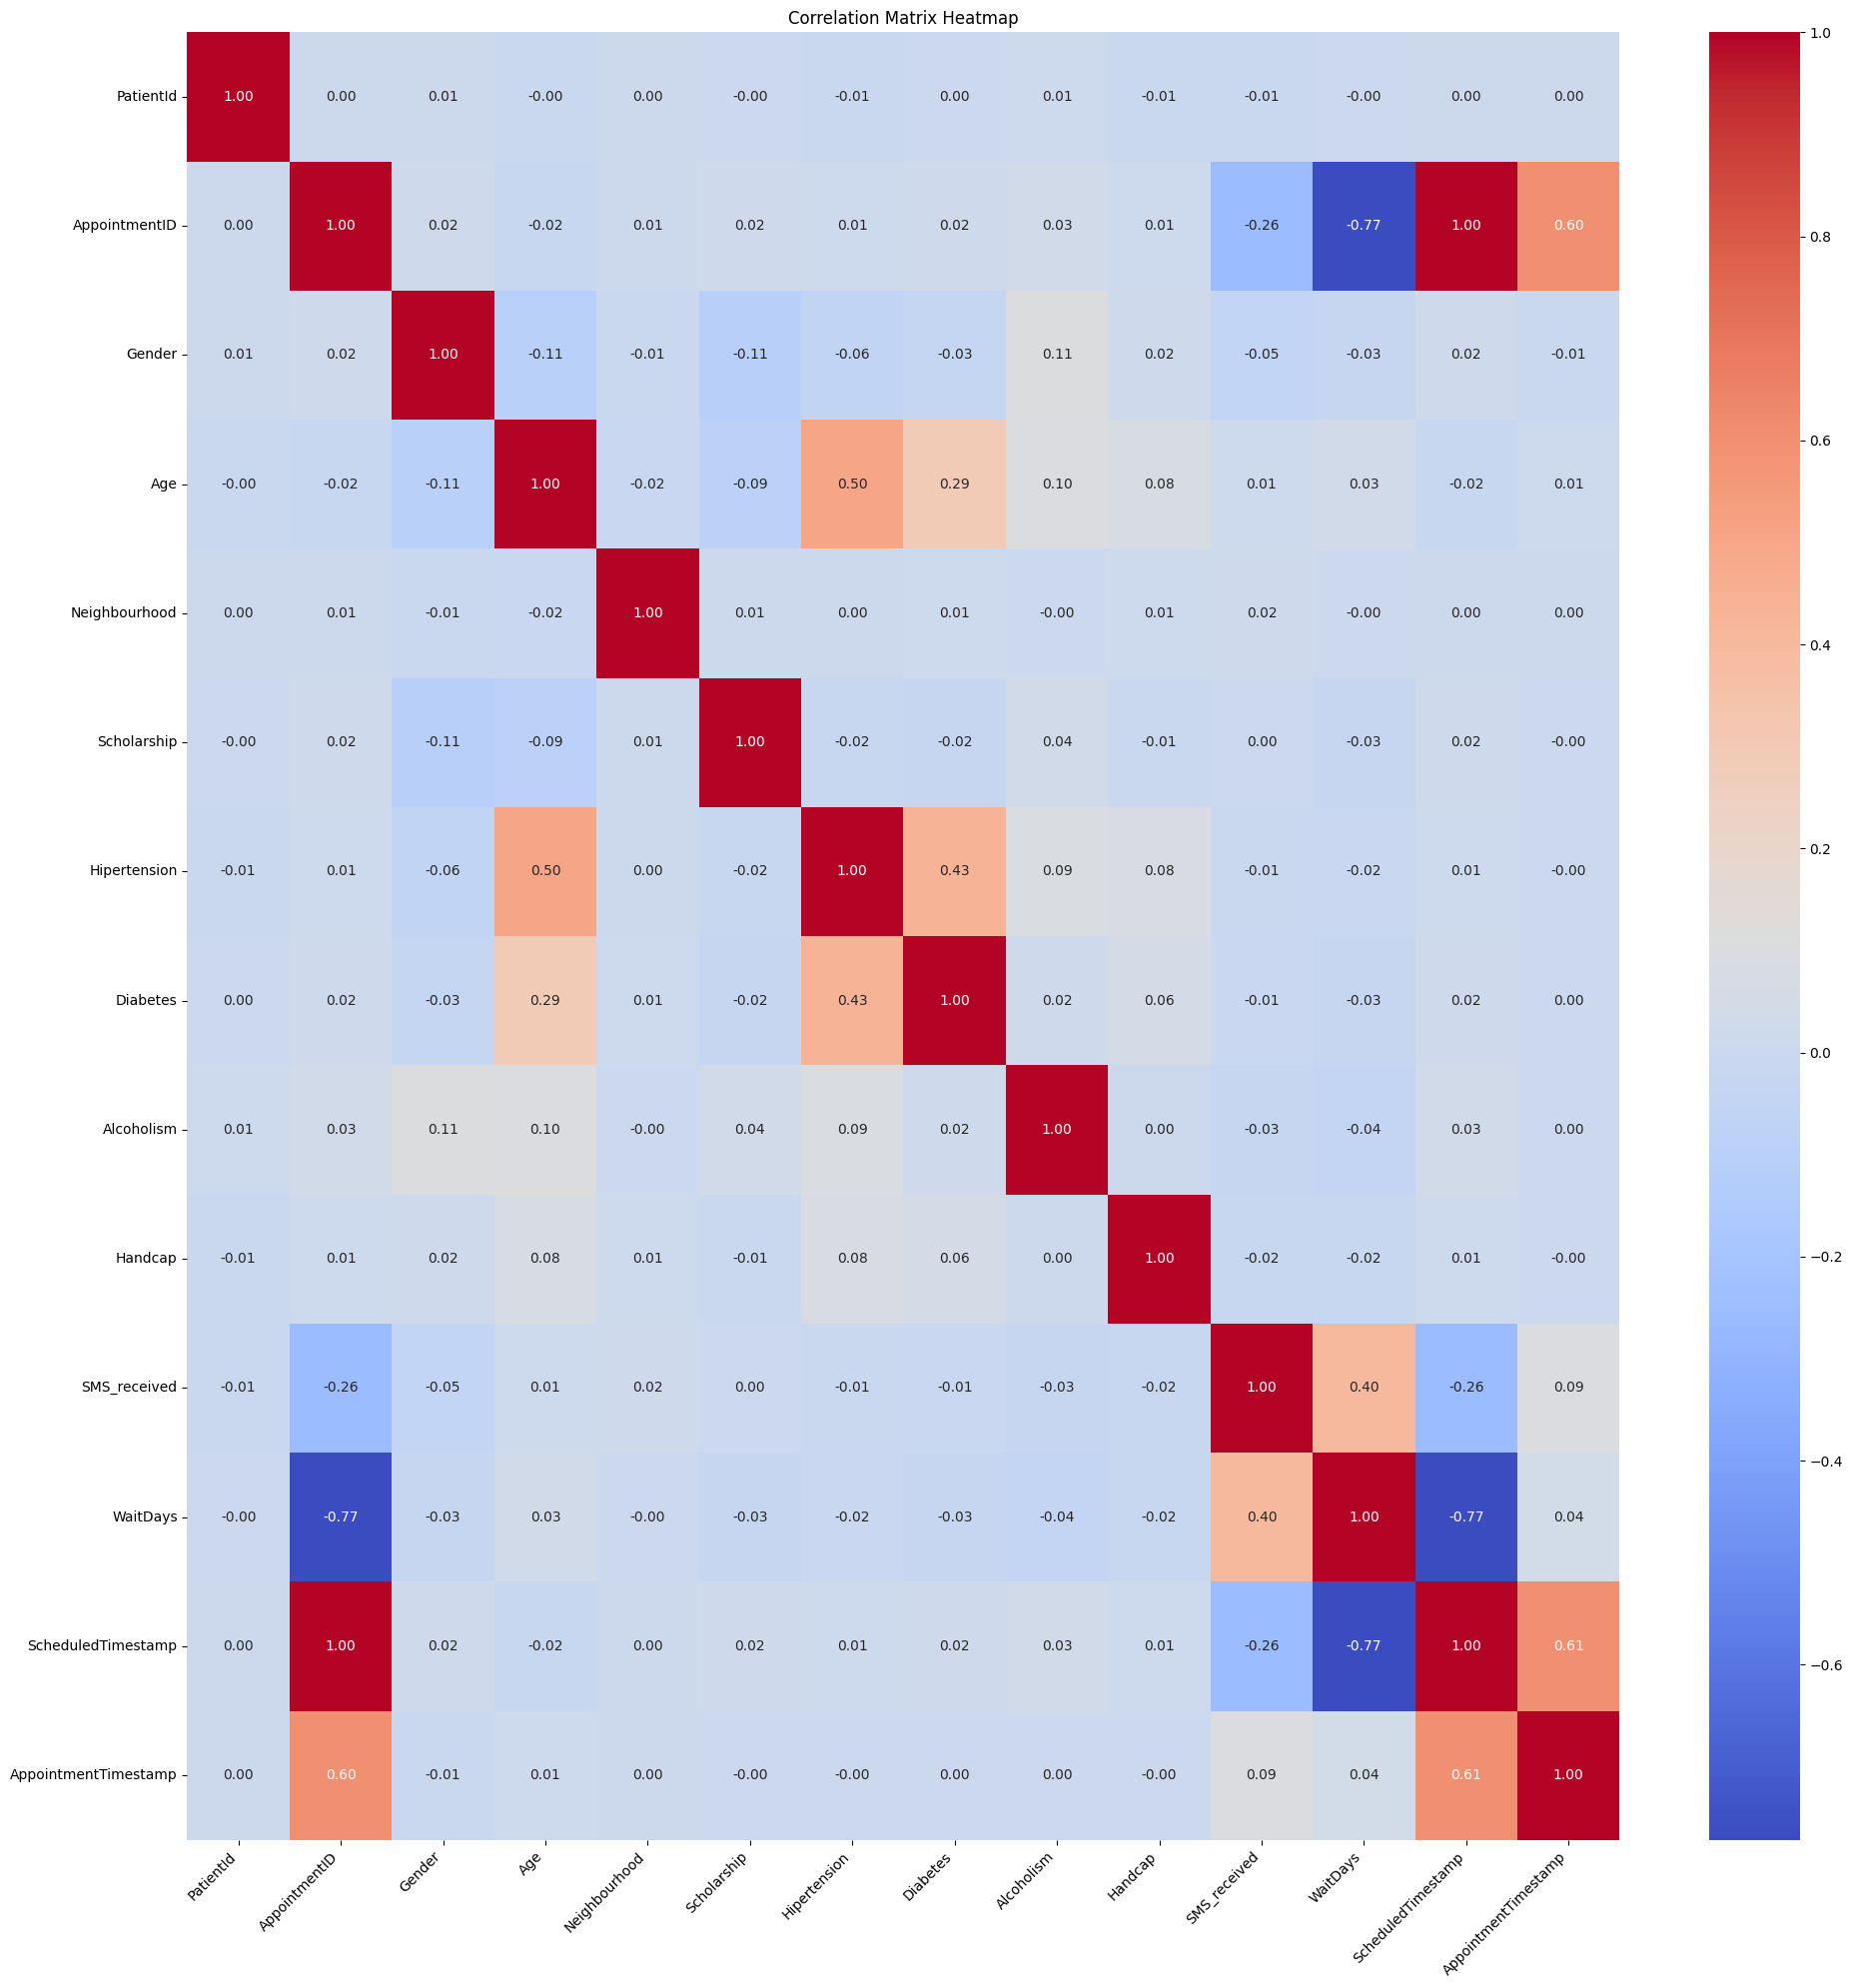


Highly correlated feature pairs (|correlation| > 0.8):
AppointmentID <-> ScheduledTimestamp: 0.998


In [42]:
# Correlation matrix (before scaling, using original features)
correlation_matrix = X.corr()
plt.figure(figsize=(20, 20))
plt.title('Correlation Matrix Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            xticklabels=X.columns, yticklabels=X.columns)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identify highly correlated features (threshold > 0.8 or < -0.8)
threshold = 0.8
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                correlation_matrix.iloc[i, j]
            ))

print(f"\nHighly correlated feature pairs (|correlation| > {threshold}):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1} <-> {feat2}: {corr:.3f}")

## Drop Features

In [43]:
X = X.drop(columns=['AppointmentID'])
X = X.drop(columns=['PatientId']) # dropping because it is an identifier
X = X.drop(columns=['ScheduledTimestamp', 'AppointmentTimestamp']) # dropping timestamps used only for correlation analysis
print(f"Features shape: {X.shape}")
print(f"Remaining feature columns: {list(X.columns)}")

Features shape: (110527, 10)
Remaining feature columns: ['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'WaitDays']


## Split Data

In [44]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
# Stratify by y to maintain class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts())
print(f"\nClass distribution in test set:")
print(y_test.value_counts())

Training set: (88421, 10)
Test set: (22106, 10)

Class distribution in training set:
No-show
0    70566
1    17855
Name: count, dtype: int64

Class distribution in test set:
No-show
0    17642
1     4464
Name: count, dtype: int64


## Scale Data

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), 
    columns=X_train.columns,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test), 
    columns=X_test.columns,
    index=X_test.index
)

print(f"Scaled training set: {X_train_scaled.shape}")
print(f"Scaled test set: {X_test_scaled.shape}")

Scaled training set: (88421, 10)
Scaled test set: (22106, 10)


## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

print("Applying SMOTE to training data...")
print(f"Before SMOTE - Class distribution:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Convert back to DataFrame to preserve column names
X_train_resampled = pd.DataFrame(
    X_train_resampled, 
    columns=X_train_scaled.columns
)

print(f"\nAfter SMOTE - Class distribution:")
print(pd.Series(y_train_resampled).value_counts())
print(f"\nResampled training set shape: {X_train_resampled.shape}")
print(f"Original test set shape: {X_test_scaled.shape}")


Applying SMOTE to training data...
Before SMOTE - Class distribution:
No-show
0    70566
1    17855
Name: count, dtype: int64

After SMOTE - Class distribution:
No-show
0    70566
1    70566
Name: count, dtype: int64

Resampled training set shape: (141132, 10)
Original test set shape: (22106, 10)


In [47]:
# Reusable evaluation function for all models
def evaluate_model(y_test, y_pred, y_pred_proba, model_name):
    """
    Evaluate model performance with comprehensive metrics.
    
    Parameters:
    -----------
    y_test : array-like
        True labels
    y_pred : array-like
        Predicted labels
    y_pred_proba : array-like
        Predicted probabilities for positive class (No-Show)
    model_name : str
        Name of the model for display purposes
    """
    from sklearn.metrics import (
        roc_auc_score, 
        classification_report, 
        confusion_matrix,
        roc_curve,
        recall_score,
        precision_score,
        f1_score
    )
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    recall = recall_score(y_test, y_pred, pos_label=1)  # Minority class (No-Show)
    precision = precision_score(y_test, y_pred, pos_label=1)  # Minority class (No-Show)
    f1 = f1_score(y_test, y_pred, pos_label=1)  # Minority class (No-Show)
    
    # Print evaluation metrics
    print(f"\n{'='*60}")
    print(f"TEST SET EVALUATION - {model_name}")
    print(f"{'='*60}")
    print(f"\nROC-AUC Score: {roc_auc:.4f}")
    print(f"Precision (No-Show): {precision:.4f}")
    print(f"Recall (No-Show): {recall:.4f}")
    print(f"F1-Score (No-Show): {f1:.4f}")
    
    # Classification Report
    print(f"\n{'='*60}")
    print("CLASSIFICATION REPORT")
    print(f"{'='*60}")
    print(classification_report(y_test, y_pred, target_names=['Show', 'No-Show']))
    
    # Confusion Matrix
    print(f"\n{'='*60}")
    print("CONFUSION MATRIX")
    print(f"{'='*60}")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Visual Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Show', 'No-Show'],
                yticklabels=['Show', 'No-Show'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return {
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Function to find optimal threshold
def find_optimal_threshold(y_test, y_pred_proba, test_thresholds=None):
    """
    Find optimal threshold that maximizes F1-score.
    Also tests lower thresholds (0.2-0.4) if recall is still low.
    
    Parameters:
    -----------
    y_test : array-like
        True labels
    y_pred_proba : array-like
        Predicted probabilities for positive class
    test_thresholds : list, optional
        Additional thresholds to test (e.g., [0.2, 0.3, 0.4])
        
    Returns:
    --------
    optimal_threshold : float
        Optimal threshold value
    """
    from sklearn.metrics import precision_recall_curve, f1_score, recall_score, precision_score
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    
    # Calculate F1-score for each threshold
    f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-10)
    
    # Find threshold that maximizes F1-score from PR curve
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold_pr = thresholds[optimal_idx]
    
    # Test additional lower thresholds if provided
    if test_thresholds is not None:
        best_threshold = optimal_threshold_pr
        best_f1 = f1_scores[optimal_idx]
        
        print("  Testing additional thresholds:")
        for test_thresh in test_thresholds:
            y_pred_test = (y_pred_proba >= test_thresh).astype(int)
            f1_test = f1_score(y_test, y_pred_test, pos_label=1)
            recall_test = recall_score(y_test, y_pred_test, pos_label=1)
            precision_test = precision_score(y_test, y_pred_test, pos_label=1)
            
            print(f"    Threshold {test_thresh:.2f}: F1={f1_test:.4f}, Recall={recall_test:.4f}, Precision={precision_test:.4f}")
            
            # Use threshold that gives best F1-score or better recall if F1 is similar
            if f1_test > best_f1 or (abs(f1_test - best_f1) < 0.01 and recall_test > recall_score(y_test, (y_pred_proba >= best_threshold).astype(int), pos_label=1)):
                best_f1 = f1_test
                best_threshold = test_thresh
        
        return best_threshold
    
    return optimal_threshold_pr


## Logistic Regression

Performing grid search for best hyperparameters...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best hyperparameters: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation F1-Score: 0.6129

Testing thresholds to find optimal value...
  Testing additional thresholds:
    Threshold 0.20: F1=0.3360, Recall=1.0000, Precision=0.2019
    Threshold 0.30: F1=0.3360, Recall=1.0000, Precision=0.2019
    Threshold 0.40: F1=0.3707, Recall=0.9086, Precision=0.2328

Optimal threshold: 0.4588

TEST SET EVALUATION - Logistic Regression

ROC-AUC Score: 0.6722
Precision (No-Show): 0.3010
Recall (No-Show): 0.7162
F1-Score (No-Show): 0.4239

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Show       0.89      0.58      0.70     17642
     No-Show       0.30      0.72      0.42      4464

    accuracy                           0.61     22106
   macro avg       0.60      0.65      0.56     22106
weighted avg       

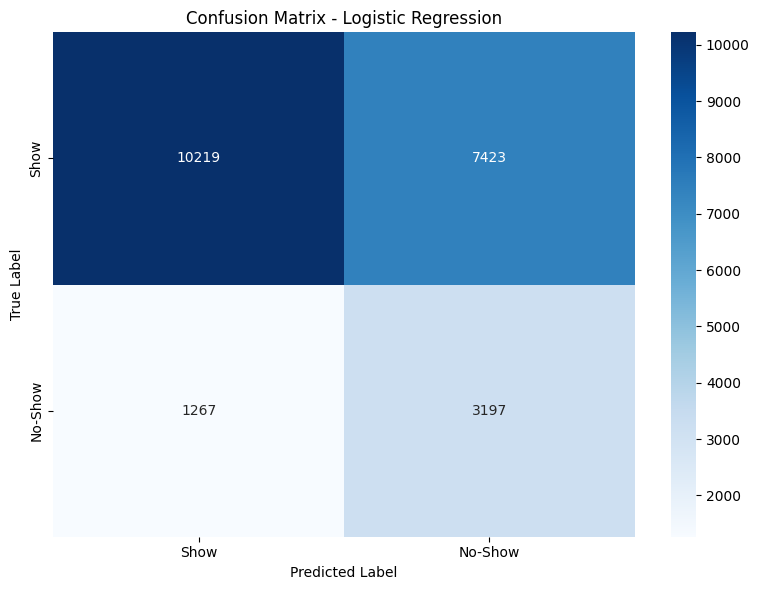

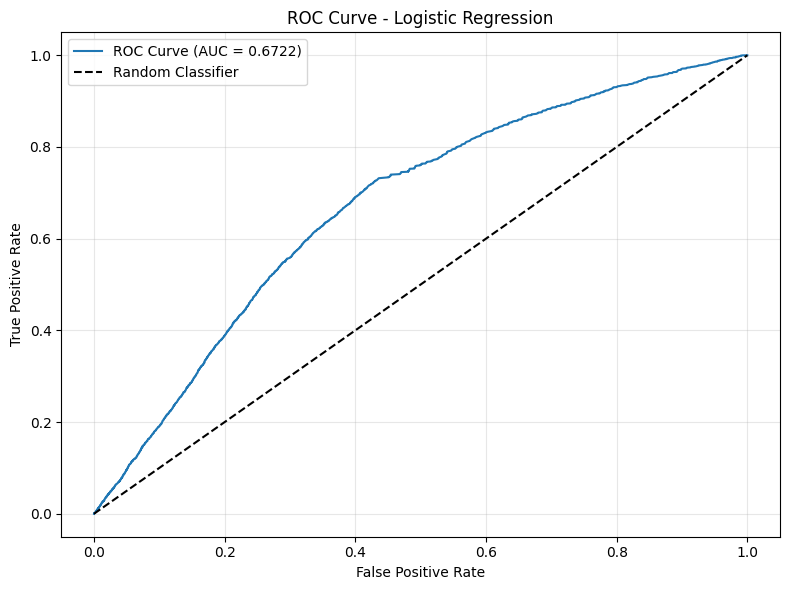

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    roc_auc_score, 
    classification_report, 
    confusion_matrix,
    roc_curve,
    recall_score,
    precision_score,
    f1_score
)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

# Create logistic regression model
lr = LogisticRegression(random_state=42, class_weight='balanced')

# Grid search with cross-validation
print("Performing grid search for best hyperparameters...")
grid_search = GridSearchCV(
    lr, 
    param_grid, 
    cv=5, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit grid search on SMOTE-resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

print(f"\nBest hyperparameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-Score: {grid_search.best_score_:.4f}")

# Train model with best hyperparameters
best_lr = grid_search.best_estimator_
y_pred_proba = best_lr.predict_proba(X_test_scaled)[:, 1]

# Find optimal threshold (test lower thresholds 0.2-0.4)
print(f"\nTesting thresholds to find optimal value...")
optimal_threshold = find_optimal_threshold(y_test, y_pred_proba, test_thresholds=[0.2, 0.3, 0.4])
print(f"\nOptimal threshold: {optimal_threshold:.4f}")

# Use optimal threshold for predictions
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate model using the reusable function
lr_metrics = evaluate_model(y_test, y_pred, y_pred_proba, "Logistic Regression")


## Random Forest

Performing random search for best hyperparameters...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best cross-validation F1-Score: 0.7933

Testing thresholds to find optimal value...
  Testing additional thresholds:
    Threshold 0.20: F1=0.4360, Recall=0.9364, Precision=0.2842
    Threshold 0.30: F1=0.4420, Recall=0.8922, Precision=0.2937
    Threshold 0.40: F1=0.4443, Recall=0.8033, Precision=0.3071

Optimal threshold: 0.4000

TEST SET EVALUATION - Random Forest

ROC-AUC Score: 0.7313
Precision (No-Show): 0.3071
Recall (No-Show): 0.8033
F1-Score (No-Show): 0.4443

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Show       0.92      0.54      0.68     17642
     No-Show       0.31      0.80      0.44      4464

    accuracy                           0.59     22106
   macro avg       0.61      0.67     

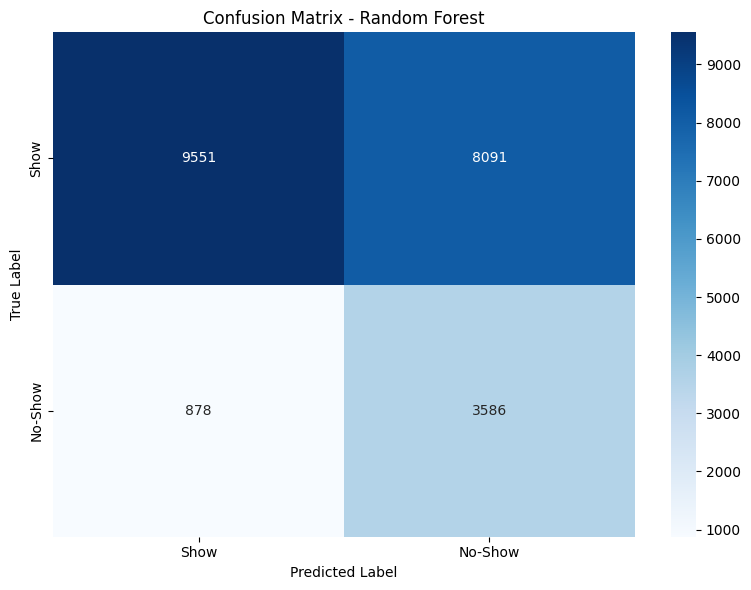

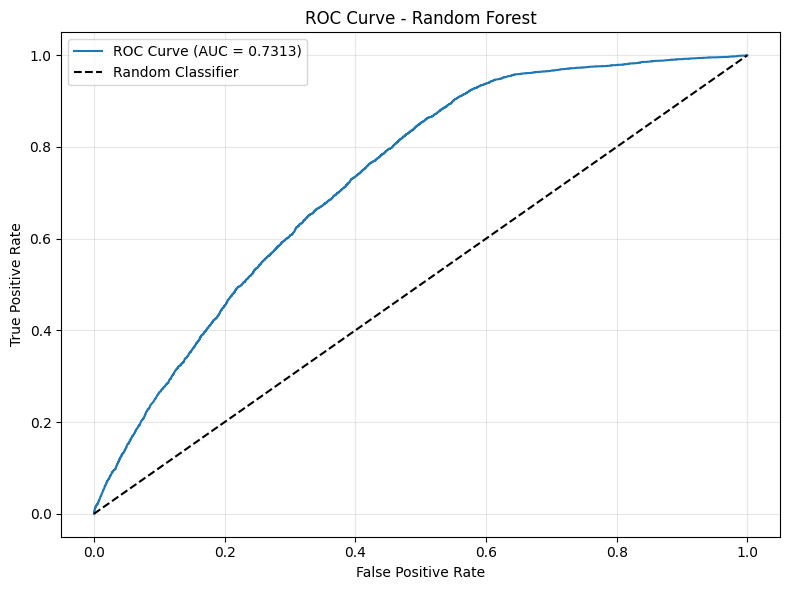

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distribution for random search (limited for faster training)
param_dist = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Create random forest model with balanced class weights
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Random search with cross-validation
print("Performing random search for best hyperparameters...")
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=12,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit random search on SMOTE-resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

print(f"\nBest hyperparameters: {random_search.best_params_}")
print(f"Best cross-validation F1-Score: {random_search.best_score_:.4f}")

# Train model with best hyperparameters
best_rf = random_search.best_estimator_
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Find optimal threshold (test lower thresholds 0.2-0.4)
print(f"\nTesting thresholds to find optimal value...")
optimal_threshold = find_optimal_threshold(y_test, y_pred_proba, test_thresholds=[0.2, 0.3, 0.4])
print(f"\nOptimal threshold: {optimal_threshold:.4f}")

# Use optimal threshold for predictions
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate model using the reusable function
rf_metrics = evaluate_model(y_test, y_pred, y_pred_proba, "Random Forest")

## Neural Network

Class imbalance ratio (negative/positive): 3.95
Using class_weight: {0: 1.0, 1: np.float64(3.952170260431252)}
Performing random search for best hyperparameters...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best hyperparameters: {'max_iter': 500, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'alpha': 0.1, 'activation': 'relu'}
Best cross-validation F1-Score: 0.7263

Testing thresholds to find optimal value...
  Testing additional thresholds:
    Threshold 0.20: F1=0.4030, Recall=0.9653, Precision=0.2547
    Threshold 0.30: F1=0.4298, Recall=0.9469, Precision=0.2780
    Threshold 0.40: F1=0.4367, Recall=0.9312, Precision=0.2853

Optimal threshold: 0.5590

TEST SET EVALUATION - Neural Network

ROC-AUC Score: 0.7301
Precision (No-Show): 0.3191
Recall (No-Show): 0.7471
F1-Score (No-Show): 0.4472

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Show       0.90      0.60      0.72     17642

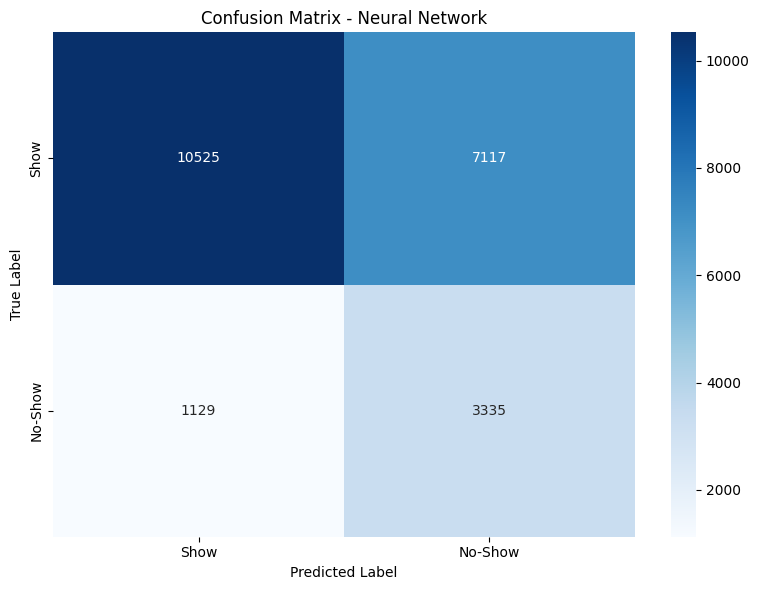

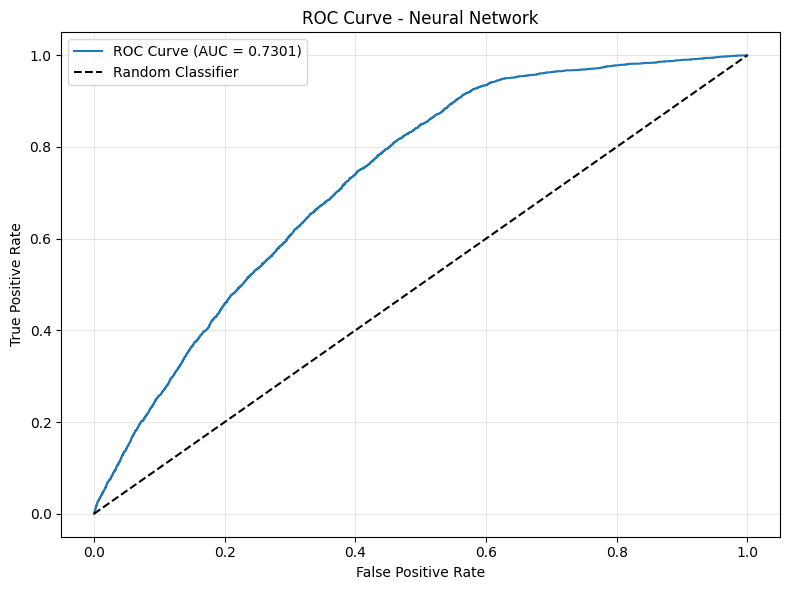

In [ ]:
from sklearn.neural_network import MLPClassifier

# Calculate class imbalance ratio for class_weight
# ratio = negative_samples / positive_samples
class_weight_ratio = (y_train == 0).sum() / (y_train == 1).sum()
class_weight_dict = {0: 1.0, 1: class_weight_ratio}
print(f"Class imbalance ratio (negative/positive): {class_weight_ratio:.2f}")
print(f"Using class_weight: {class_weight_dict}")

# Define hyperparameter distribution for random search
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 300, 500]
}

# Create neural network model
nn = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1)

# Random search with cross-validation
print("Performing random search for best hyperparameters...")
random_search = RandomizedSearchCV(
    nn,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit random search on SMOTE-resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

print(f"\nBest hyperparameters: {random_search.best_params_}")
print(f"Best cross-validation F1-Score: {random_search.best_score_:.4f}")

# Train model with best hyperparameters
best_nn = random_search.best_estimator_
y_pred_proba = best_nn.predict_proba(X_test_scaled)[:, 1]

# Find optimal threshold (test lower thresholds 0.2-0.4)
print(f"\nTesting thresholds to find optimal value...")
optimal_threshold = find_optimal_threshold(y_test, y_pred_proba, test_thresholds=[0.2, 0.3, 0.4])
print(f"\nOptimal threshold: {optimal_threshold:.4f}")

# Use optimal threshold for predictions
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# Evaluate model using the reusable function
nn_metrics = evaluate_model(y_test, y_pred, y_pred_proba, "Neural Network")

## XGBoost

Class imbalance ratio (negative/positive): 3.95
Using scale_pos_weight values: [5, 6, 7] (higher than ratio to boost recall)
Performing random search for best hyperparameters...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best hyperparameters: {'subsample': 1.0, 'scale_pos_weight': 5, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.6}
Best cross-validation F1-Score: 0.7749

Testing thresholds to find optimal value...
  Testing additional thresholds:
    Threshold 0.20: F1=0.4073, Recall=0.8757, Precision=0.2653
    Threshold 0.30: F1=0.4178, Recall=0.8116, Precision=0.2813
    Threshold 0.40: F1=0.4208, Recall=0.7406, Precision=0.2939

Optimal threshold: 0.4000

TEST SET EVALUATION - XGBoost

ROC-AUC Score: 0.7014
Precision (No-Show): 0.2939
Recall (No-Show): 0.7406
F1-Score (No-Show): 0.4208

CLASSIFICATION REPORT
              precision    recall  f1-score   support

        Show       0.89      0.55      0.6

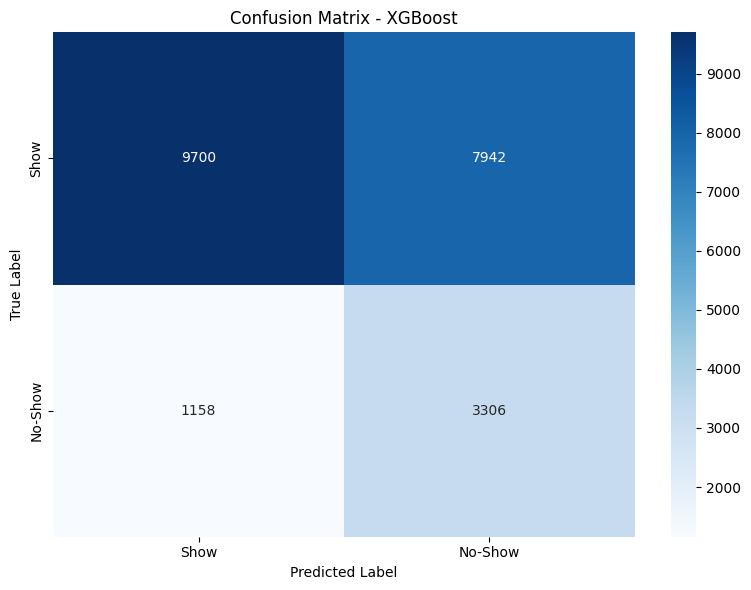

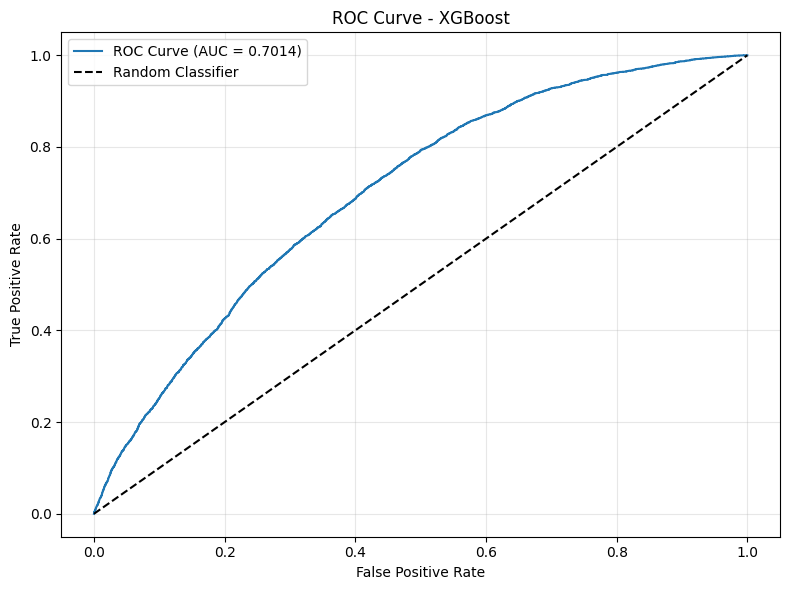

In [ ]:
from xgboost import XGBClassifier

# Calculate class imbalance ratio for scale_pos_weight
# ratio = negative_samples / positive_samples
scale_pos_weight_ratio = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Class imbalance ratio (negative/positive): {scale_pos_weight_ratio:.2f}")
print(f"Using scale_pos_weight values: [5, 6, 7] (higher than ratio to boost recall)")

# Define hyperparameter distribution for random search
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [5, 6, 7]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss', scale_pos_weight=scale_pos_weight_ratio)

# Random search with cross-validation
print("Performing random search for best hyperparameters...")
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit random search on SMOTE-resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

print(f"\nBest hyperparameters: {random_search.best_params_}")
print(f"Best cross-validation F1-Score: {random_search.best_score_:.4f}")

# Train model with best hyperparameters
best_xgb = random_search.best_estimator_
y_pred_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

# Find optimal threshold
print(f"\nTesting thresholds to find optimal value...")
optimal_threshold = find_optimal_threshold(y_test, y_pred_proba, test_thresholds=[0.2, 0.3, 0.4])
print(f"\nOptimal threshold: {optimal_threshold:.4f}")

# Use optimal threshold for predictions
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

xgb_metrics = evaluate_model(y_test, y_pred, y_pred_proba, "XGBoost")

## Evaluation Metrics Comparison

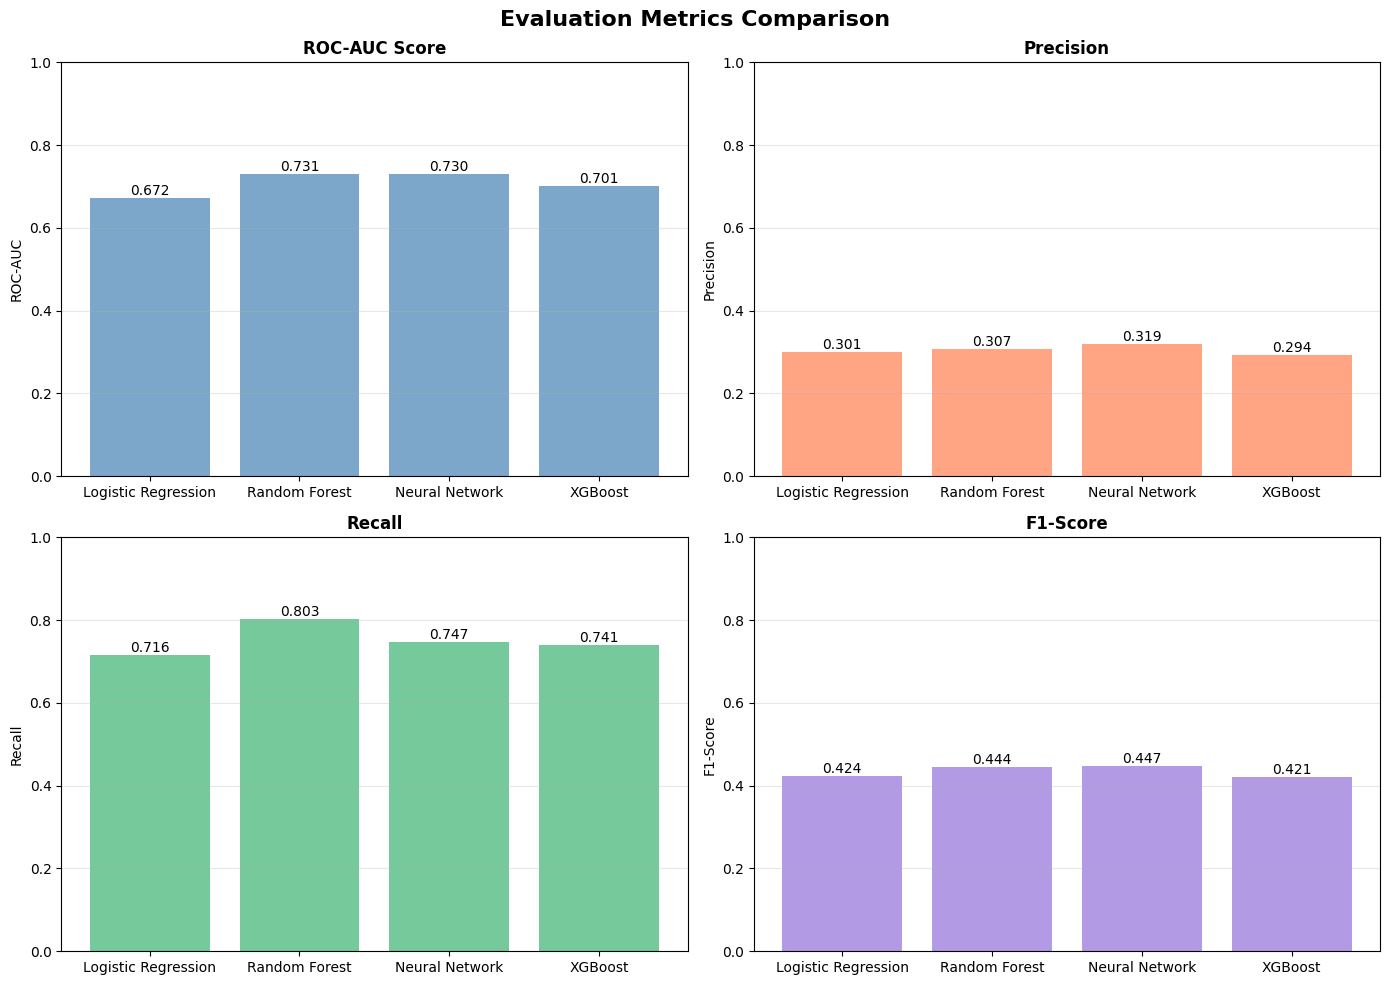


DETAILED METRICS COMPARISON

Model                ROC-AUC    Precision  Recall     F1-Score  
------------------------------------------------------------
Logistic Regression  0.6722     0.3010     0.7162     0.4239    
Random Forest        0.7313     0.3071     0.8033     0.4443    
Neural Network       0.7301     0.3191     0.7471     0.4472    
XGBoost              0.7014     0.2939     0.7406     0.4208    


In [52]:
# Collect all model metrics
all_models = {
    'Logistic Regression': lr_metrics,
    'Random Forest': rf_metrics,
    'Neural Network': nn_metrics,
    'XGBoost': xgb_metrics
}

# Prepare data for visualization
metrics_data = {
    'ROC-AUC': [all_models[model]['roc_auc'] for model in all_models],
    'Precision': [all_models[model]['precision'] for model in all_models],
    'Recall': [all_models[model]['recall'] for model in all_models],
    'F1-Score': [all_models[model]['f1'] for model in all_models]
}

model_names = list(all_models.keys())

# Create bar charts for each metric
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Evaluation Metrics Comparison', fontsize=16, fontweight='bold')

# ROC-AUC Chart
ax1 = axes[0, 0]
bars1 = ax1.bar(model_names, metrics_data['ROC-AUC'], color='steelblue', alpha=0.7)
ax1.set_title('ROC-AUC Score', fontweight='bold')
ax1.set_ylabel('ROC-AUC')
ax1.set_ylim(0, 1)
ax1.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# Precision Chart
ax2 = axes[0, 1]
bars2 = ax2.bar(model_names, metrics_data['Precision'], color='coral', alpha=0.7)
ax2.set_title('Precision', fontweight='bold')
ax2.set_ylabel('Precision')
ax2.set_ylim(0, 1)
ax2.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# Recall Chart
ax3 = axes[1, 0]
bars3 = ax3.bar(model_names, metrics_data['Recall'], color='mediumseagreen', alpha=0.7)
ax3.set_title('Recall', fontweight='bold')
ax3.set_ylabel('Recall')
ax3.set_ylim(0, 1)
ax3.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

# F1-Score Chart
ax4 = axes[1, 1]
bars4 = ax4.bar(model_names, metrics_data['F1-Score'], color='mediumpurple', alpha=0.7)
ax4.set_title('F1-Score', fontweight='bold')
ax4.set_ylabel('F1-Score')
ax4.set_ylim(0, 1)
ax4.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars4:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed comparison table
print("\n" + "="*60)
print("DETAILED METRICS COMPARISON")
print("="*60)
print(f"\n{'Model':<20} {'ROC-AUC':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-"*60)
for model_name in all_models:
    metrics = all_models[model_name]
    print(f"{model_name:<20} {metrics['roc_auc']:<10.4f} {metrics['precision']:<10.4f} "
          f"{metrics['recall']:<10.4f} {metrics['f1']:<10.4f}")


## Save Best Model

In [ ]:
import pickle
import os
from pathlib import Path

# Create models directory if it doesn't exist
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# Determine best model based on highest ROC-AUC
best_model_name = max(all_models.keys(), 
                     key=lambda x: all_models[x]['roc_auc'])

# Map model names to actual model objects
model_map = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,
    'Neural Network': best_nn,
    'XGBoost': best_xgb
}

best_model = model_map[best_model_name]

print("="*60)
print("SAVING MODEL")
print("="*60)
print(f"Selected model: {best_model_name}")
print(f"ROC-AUC: {all_models[best_model_name]['roc_auc']:.4f}")
print(f"Precision: {all_models[best_model_name]['precision']:.4f}")
print(f"Recall: {all_models[best_model_name]['recall']:.4f}")
print(f"F1-Score: {all_models[best_model_name]['f1']:.4f}")

# Save model
model_path = models_dir / "model.pkl"
with open(model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"\nModel saved to: {model_path}")

# Save scaler
scaler_path = models_dir / "scaler.pkl"
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to: {scaler_path}")

# Save label encoder
label_encoder_path = models_dir / "label_encoder.pkl"
with open(label_encoder_path, 'wb') as f:
    pickle.dump(le, f)
print(f"Label encoder saved to: {label_encoder_path}")

print("\nAll files saved successfully!")


SAVING MODEL
Selected model: Random Forest
ROC-AUC: 0.7313
Precision: 0.3071
Recall: 0.8033
F1-Score: 0.4443

Model saved to: models\model.pkl
Scaler saved to: models\scaler.pkl
Label encoder saved to: models\label_encoder.pkl

All files saved successfully!


## Feature Importance


FEATURE IMPORTANCE

Top 10 Most Important Features:
      feature  importance
     WaitDays    0.589884
          Age    0.195674
Neighbourhood    0.150960
 SMS_received    0.023346
       Gender    0.011530
 Hipertension    0.006464
      Handcap    0.006445
  Scholarship    0.006230
   Alcoholism    0.005230
     Diabetes    0.004237


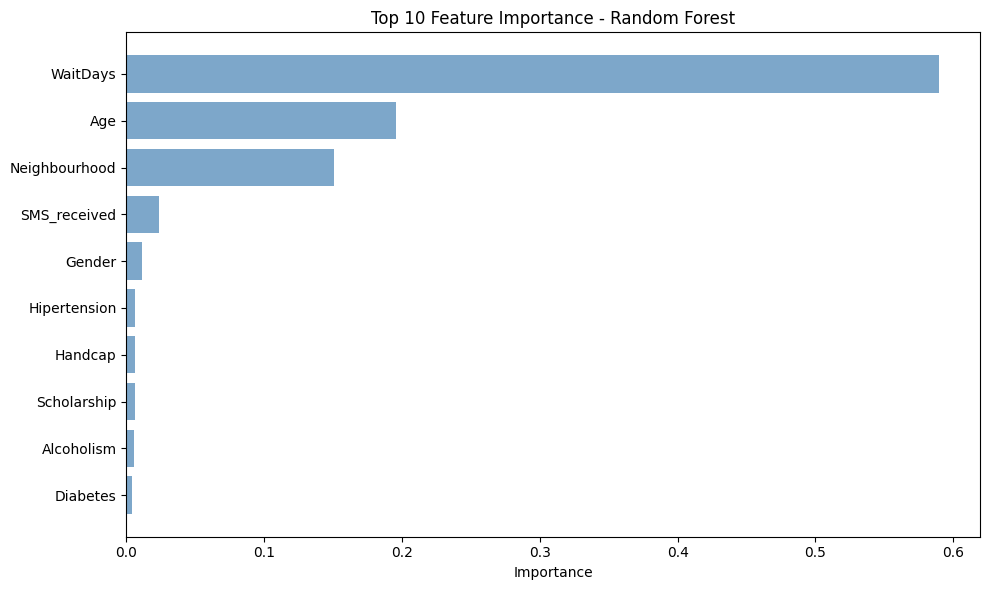

In [ ]:
# Show feature importance (for tree-based models)
print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)

if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    top_features = feature_importance.head(10)
    plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Importance')
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"\n{best_model_name} does not support feature_importances_.")
    print("Feature importance is available for tree-based models (Random Forest, XGBoost).")